### 1. Importation des bibliothèques nécessaires

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.linear_model import LinearRegression, Ridge, Lasso, ElasticNet
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import mean_squared_error

In [3]:
import scipy.stats as stats

## Chargement du jeu de données

In [5]:
data = pd.read_csv('prostate_dataset.txt', delim_whitespace=True)
data.head()

C:\Users\SAM\AppData\Local\Temp\ipykernel_6400\3287033354.py:1: FutureWarning: The 'delim_whitespace' keyword in pd.read_csv is deprecated and will be removed in a future version. Use ``sep='\s+'`` instead
  data = pd.read_csv('prostate_dataset.txt', delim_whitespace=True)


,col,lcavol,lweight,age,lbph,svi,lcp,gleason,pgg45,lpsa,train
0,1,-0.579818,2.769459,50,-1.386294,0,-1.386294,6,0,-0.430783,T
1,2,-0.994252,3.319626,58,-1.386294,0,-1.386294,6,0,-0.162519,T
2,3,-0.510826,2.691243,74,-1.386294,0,-1.386294,7,20,-0.162519,T
3,4,-1.203973,3.282789,58,-1.386294,0,-1.386294,6,0,-0.162519,T
4,5,0.751416,3.432373,62,-1.386294,0,-1.386294,6,0,0.371564,T


## 2. Suppression des colonnes "col" et "train"

In [7]:
data = data.drop(columns=['col', 'train'])
data.columns

Index(['lcavol', 'lweight', 'age', 'lbph', 'svi', 'lcp', 'gleason', 'pgg45',
       'lpsa'],
      dtype='object')

## 3. Nettoyage des données

### a- Conversion de type

In [10]:
data.dtypes

lcavol     float64
lweight    float64
age          int64
lbph       float64
svi          int64
lcp        float64
gleason      int64
pgg45        int64
lpsa       float64
dtype: object

In [11]:
data.head()

,lcavol,lweight,age,lbph,svi,lcp,gleason,pgg45,lpsa
0,-0.579818,2.769459,50,-1.386294,0,-1.386294,6,0,-0.430783
1,-0.994252,3.319626,58,-1.386294,0,-1.386294,6,0,-0.162519
2,-0.510826,2.691243,74,-1.386294,0,-1.386294,7,20,-0.162519
3,-1.203973,3.282789,58,-1.386294,0,-1.386294,6,0,-0.162519
4,0.751416,3.432373,62,-1.386294,0,-1.386294,6,0,0.371564


In [12]:
data["svi"].value_counts()

svi
0    76
1    21
Name: count, dtype: int64

In [13]:
data["svi"].astype("object")

0     0
1     0
2     0
3     0
4     0
     ..
92    1
93    1
94    1
95    1
96    1
Name: svi, Length: 97, dtype: object

In [14]:
data["pgg45"].value_counts()

pgg45
0      35
20      9
60      8
5       6
40      6
30      5
70      5
15      5
10      4
80      3
50      3
35      1
6       1
100     1
4       1
95      1
25      1
90      1
75      1
Name: count, dtype: int64

Elle semble aussi être catégorielle

In [16]:
data["pgg45"].astype("object")

0      0
1      0
2     20
3      0
4      0
      ..
92    60
93    40
94    10
95    80
96    20
Name: pgg45, Length: 97, dtype: object

In [17]:
data["gleason"].value_counts()

gleason
7    56
6    35
9     5
8     1
Name: count, dtype: int64

In [18]:
#de même pour cet variable
data["gleason"].astype("object")

0     6
1     6
2     7
3     6
4     6
     ..
92    7
93    7
94    7
95    7
96    7
Name: gleason, Length: 97, dtype: object

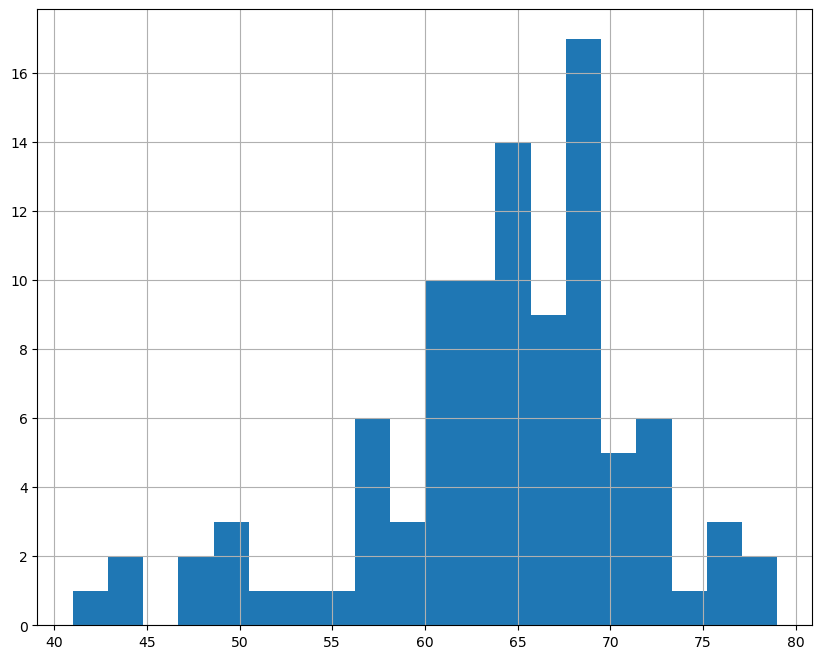

In [19]:
data["age"].hist(bins=20, figsize=(10,8))
plt.show()

La variable age peut être perçue comme une variable catégarielle, si on veut par la suite on peut la repartir en tranche d'âge de sorte à l'utiliser une variable qualitative

### b- Traitements des valeurs manquantes

In [22]:
print(data.isnull().sum())# nous n'avons pas de valeurs manquantes

lcavol     0
lweight    0
age        0
lbph       0
svi        0
lcp        0
gleason    0
pgg45      0
lpsa       0
dtype: int64


#### Il n'y a pas de valeurs manquantes.

### c- Traitement des valeurs aberrantes

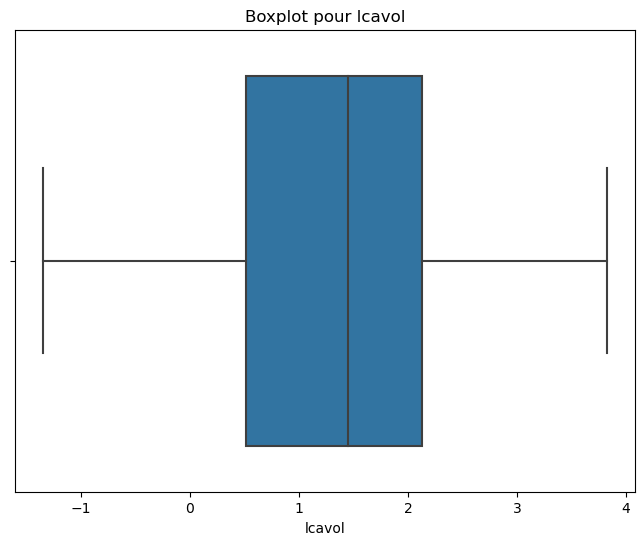

In [25]:
#  Boxplot pour la variable lcavol
plt.figure(figsize=(8, 6))
sns.boxplot(x=data['lcavol'])
plt.title('Boxplot pour lcavol')
plt.show()

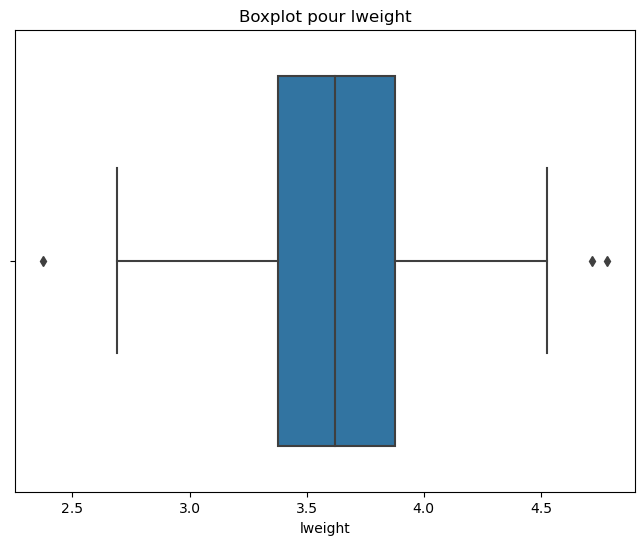

In [26]:
#  Boxplot pour la variable lcavol
plt.figure(figsize=(8, 6))
sns.boxplot(x=data['lweight'])
plt.title('Boxplot pour lweight')
plt.show()

Il y a des valeurs aberrantes.

Valeurs aberrantes dans lpsa selon IQR : Index([37, 69, 88], dtype='int64')
Valeurs aberrantes remplacées par la moyenne dans lweight avec IQR


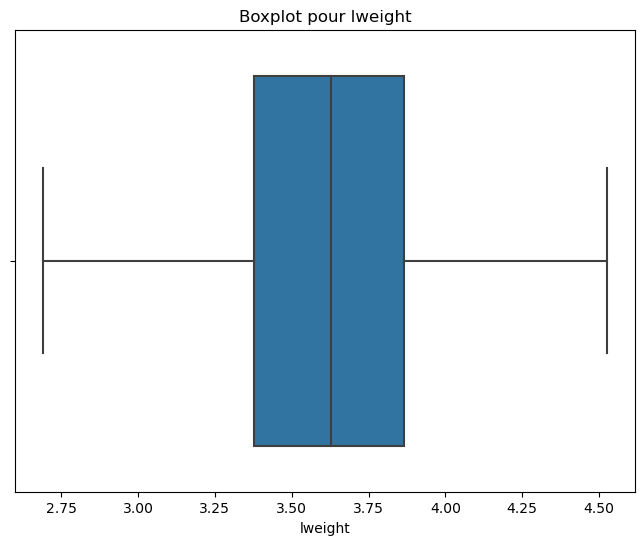

In [28]:
Q1 = data['lweight'].quantile(0.25)
Q3 = data['lweight'].quantile(0.75)
IQR = Q3 - Q1
lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR

# Identifier les valeurs aberrantes
outliers_iqr = data[(data['lweight'] < lower_bound) | (data['lweight'] > upper_bound)].index
print("Valeurs aberrantes dans lpsa selon IQR :", outliers_iqr)
# Remplacement des valeurs aberrantes par la moyenne car la bd n'est pas très grande
mean_lweight= data['lweight'].mean()

data.loc[outliers_iqr, 'lweight'] = mean_lweight
print(f"Valeurs aberrantes remplacées par la moyenne dans lweight avec IQR")

plt.figure(figsize=(8, 6))
sns.boxplot(x=data['lweight'])
plt.title('Boxplot pour lweight')
plt.show()

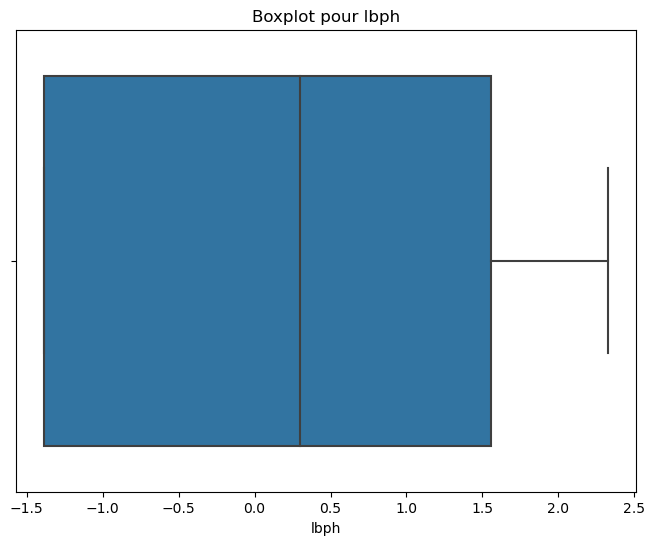

In [29]:
#  Boxplot pour la variable lbph
plt.figure(figsize=(8, 6))
sns.boxplot(x=data['lbph'])
plt.title('Boxplot pour lbph')
plt.show()

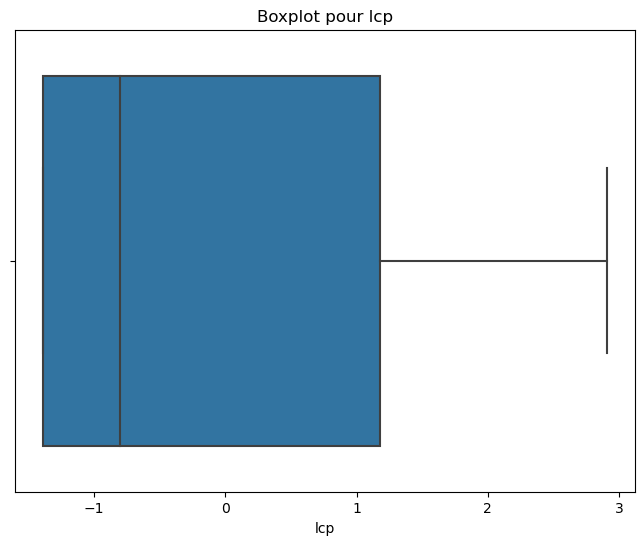

In [30]:
#  Boxplot pour la variable lcp
plt.figure(figsize=(8, 6))
sns.boxplot(x=data['lcp'])
plt.title('Boxplot pour lcp')
plt.show()

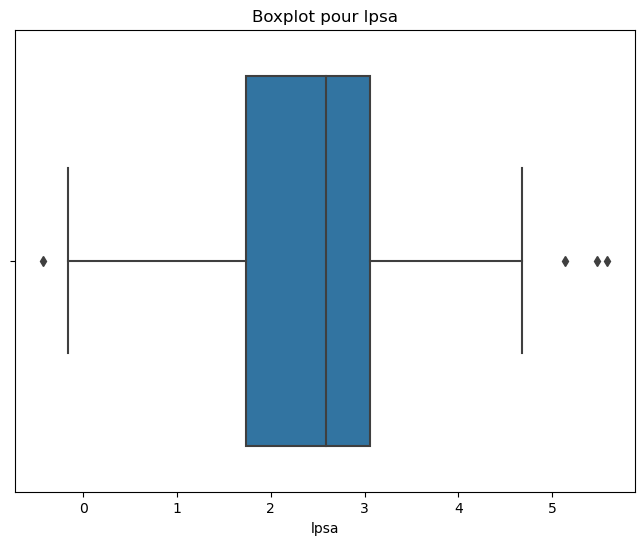

In [31]:
#  Boxplot pour la variable lpsa
plt.figure(figsize=(8, 6))
sns.boxplot(x=data['lpsa'])
plt.title('Boxplot pour lpsa')
plt.show()

Valeurs aberrantes dans age selon IQR : Index([0, 94, 95, 96], dtype='int64')
Valeurs aberrantes remplacées par la moyenne dans lpsa avec IQR


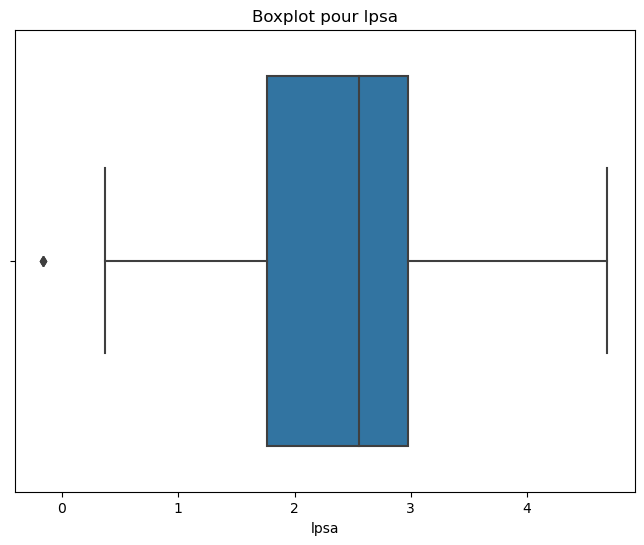

In [32]:
Q1 = data['lpsa'].quantile(0.25)
Q3 = data['lpsa'].quantile(0.75)
IQR = Q3 - Q1
lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR

# Identifier les valeurs aberrantes
outliers_iqr = data[(data['lpsa'] < lower_bound) | (data['lpsa'] > upper_bound)].index
print("Valeurs aberrantes dans age selon IQR :", outliers_iqr)
# Remplacement des valeurs aberrantes par la moyenne car la bd n'est pas très grande
mean_lpsa= data['lpsa'].mean()

data.loc[outliers_iqr, 'lpsa'] = mean_lpsa
print(f"Valeurs aberrantes remplacées par la moyenne dans lpsa avec IQR")

plt.figure(figsize=(8, 6))
sns.boxplot(x=data['lpsa'])
plt.title('Boxplot pour lpsa')
plt.show()

Variable age

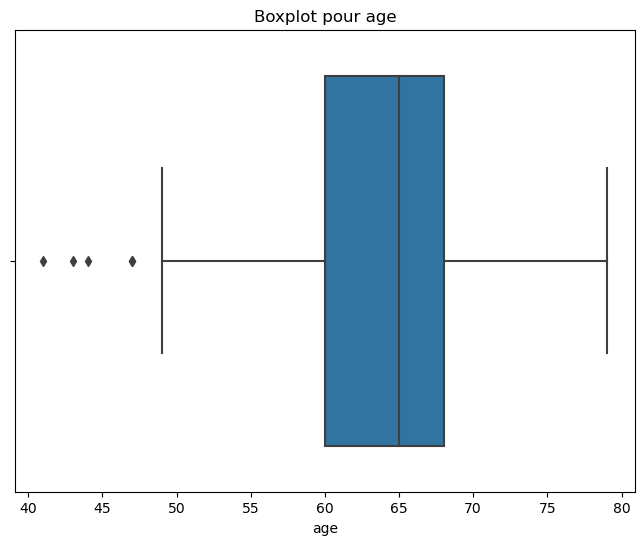

In [34]:
#  Boxplot pour la variable age
plt.figure(figsize=(8, 6))
sns.boxplot(x=data['age'])
plt.title('Boxplot pour age')
plt.show()

Cette variable sera regroupée en intervalle comme 

### d- Analyse exploratoire global

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 97 entries, 0 to 96
Data columns (total 9 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   lcavol   97 non-null     float64
 1   lweight  97 non-null     float64
 2   age      97 non-null     int64  
 3   lbph     97 non-null     float64
 4   svi      97 non-null     int64  
 5   lcp      97 non-null     float64
 6   gleason  97 non-null     int64  
 7   pgg45    97 non-null     int64  
 8   lpsa     97 non-null     float64
dtypes: float64(5), int64(4)
memory usage: 6.9 KB
None
          lcavol    lweight        age       lbph        svi        lcp  \
count  97.000000  97.000000  97.000000  97.000000  97.000000  97.000000   
mean    1.350010   3.618772  63.865979   0.100356   0.216495  -0.179366   
std     1.178625   0.375345   7.445117   1.450807   0.413995   1.398250   
min    -1.347074   2.691243  41.000000  -1.386294   0.000000  -1.386294   
25%     0.512824   3.375880  60.000000  -1.386294 

C:\Users\SAM\AppData\Local\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
C:\Users\SAM\AppData\Local\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
C:\Users\SAM\AppData\Local\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
C:\Users\SAM\AppData\Local\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future ver

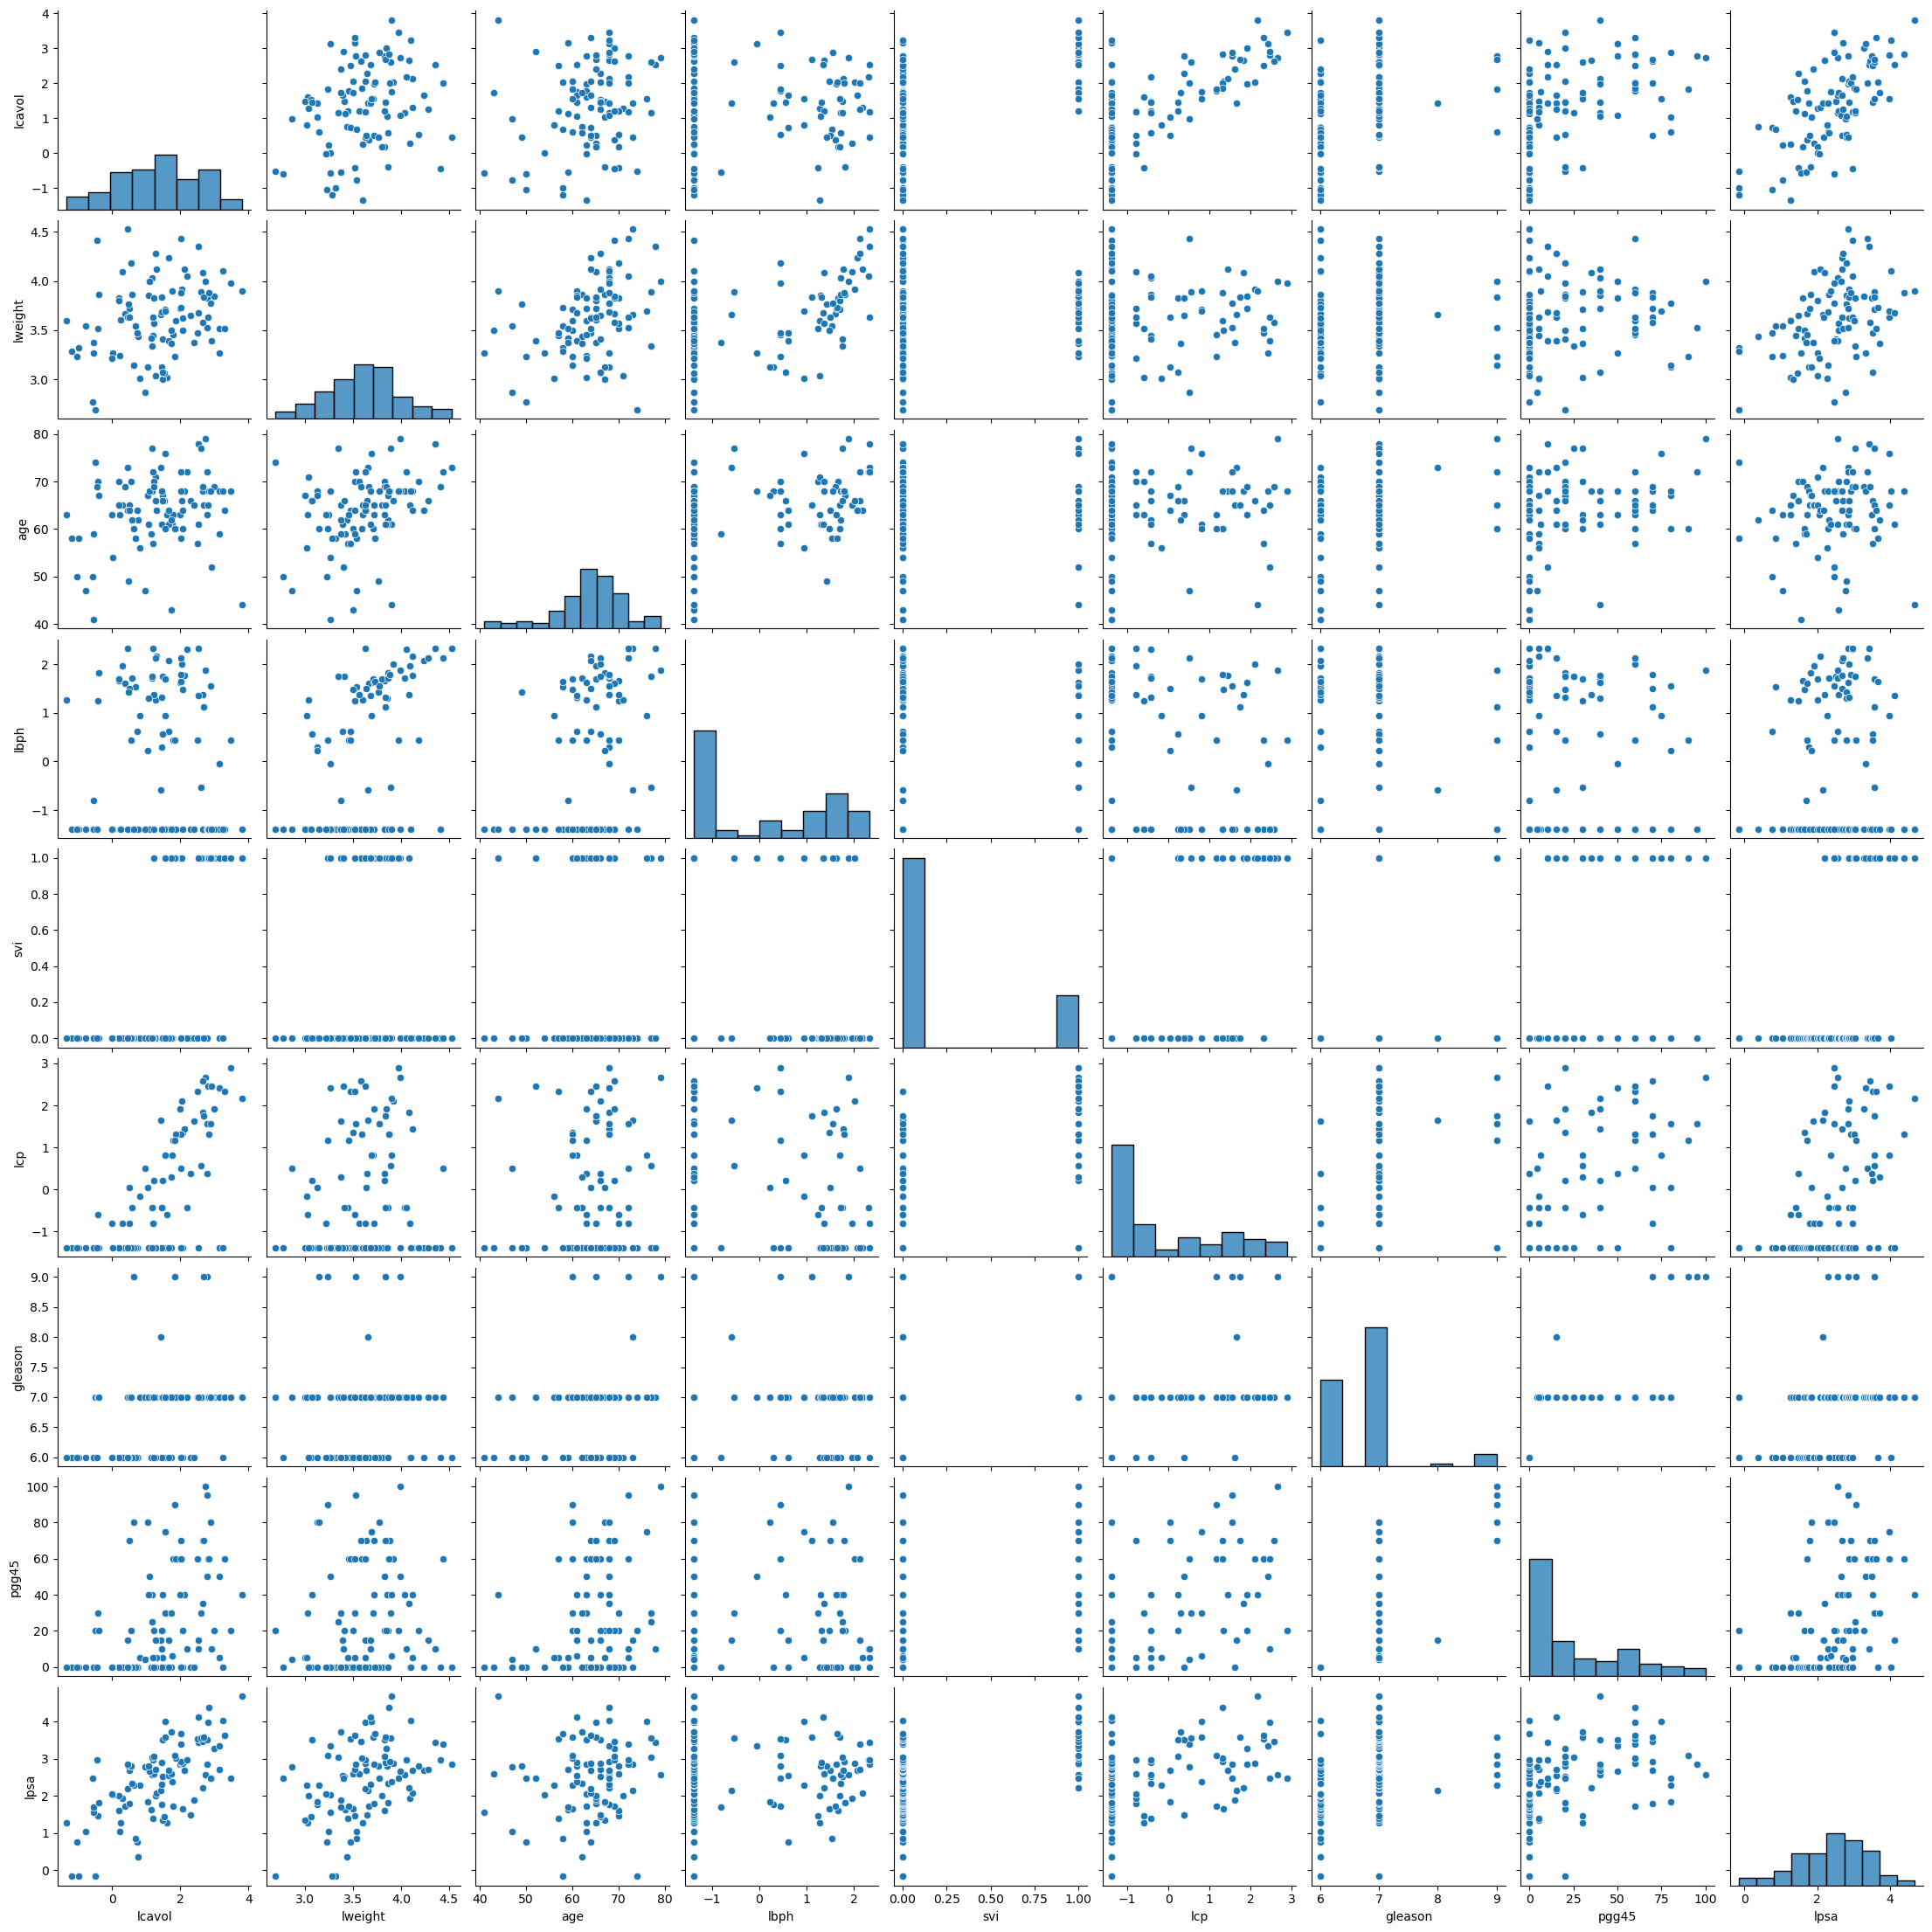

In [37]:
print(data.info())
print(data.describe(include="all"))

# Visualisation des données
sns.pairplot(data)
plt.show()

### e- Statistiques descriptives univariées

#### --- Variables quantitatives

In [40]:
quant=["lcavol", "lweight", "lpsa", "age", "lbph", "lcp"]

#### Histogrammes

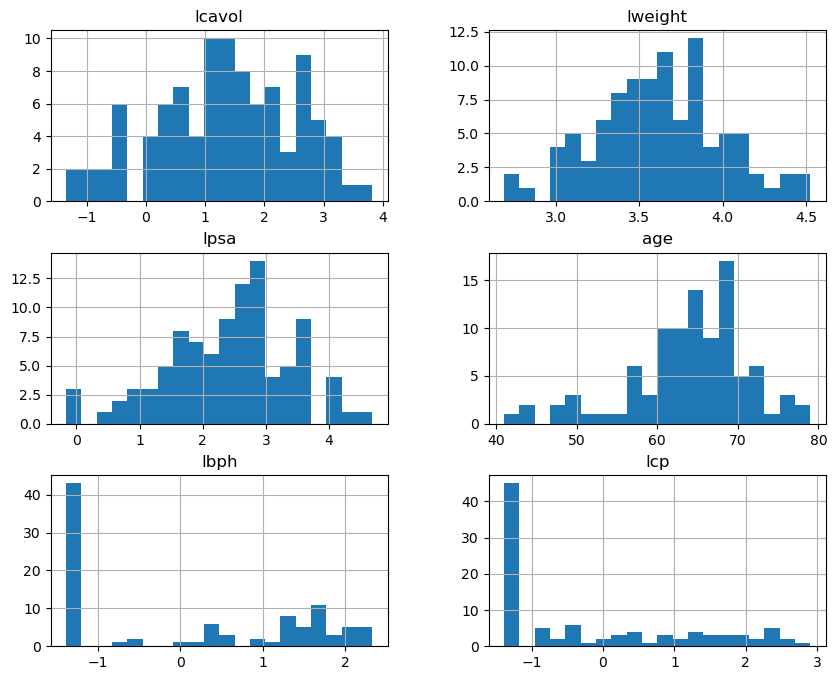

In [42]:
data[quant].hist(bins=20, figsize=(10,8))
plt.show()

Nous constatons que les variables lcavol, lweight, lpsa et age semblent avoir une distribution normale, ce que nous allons tester dans leur rublique.

#### lcavol

moyenne :  1.350009580484536
Ecart-type :  1.1786248779882171
Minimun :  -1.347073648
Minimun :  3.821003607
Statistique du test: 0.9829452633857727, p-value: 0.2414248287677765


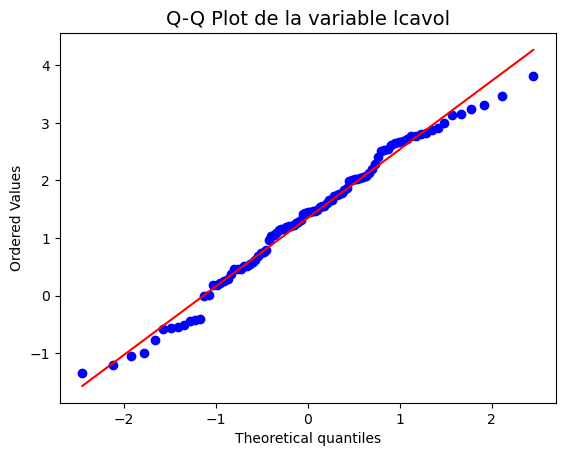

In [45]:
print("moyenne : ",data["lcavol"].mean())
print("Ecart-type : ",data["lcavol"].std())
print("Minimun : ", data["lcavol"].min())
print("Minimun : ", data["lcavol"].max())
stat, p_value = stats.shapiro(data['lcavol'])
print(f'Statistique du test: {stat}, p-value: {p_value}')# Si la pvalue > 0.05 on accpete l'hypothèse de la normalité
# traçage du qq plot 
stats.probplot(data['lcavol'], dist="norm", plot=plt)
plt.title('Q-Q Plot de la variable lcavol', fontsize=14)
plt.show()


Le QQ plot corhoborre que la var lcavol est normalement distribuée, ce qui est confirmé par le test de shapiro.

#### lweight

moyenne :  3.61877242246785
Ecart-type :  0.37534509817962874
Minimun :  2.691243
Minimun :  4.524502
Statistique du test: 0.9955094456672668, p-value: 0.9878907203674316


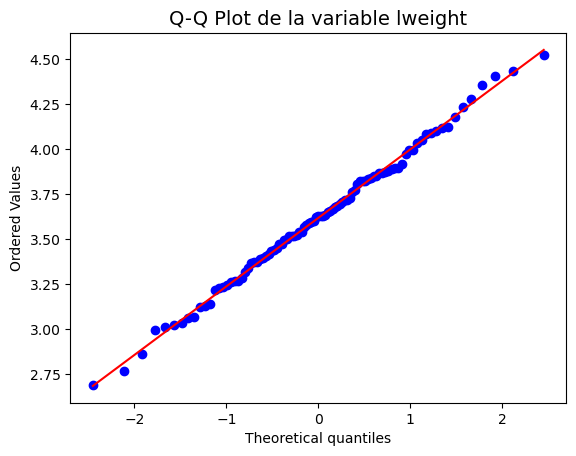

In [48]:
print("moyenne : ",data["lweight"].mean())
print("Ecart-type : ",data["lweight"].std())
print("Minimun : ", data["lweight"].min())
print("Minimun : ", data["lweight"].max())
stat, p_value = stats.shapiro(data['lweight'])
print(f'Statistique du test: {stat}, p-value: {p_value}')# Si la pvalue > 0.05 on accpete l'hypothèse de la normalité
# traçage du qq plot 
stats.probplot(data['lweight'], dist="norm", plot=plt)
plt.title('Q-Q Plot de la variable lweight', fontsize=14)
plt.show()


De même pour cette variable.

### lpsa

moyenne :  2.417982390859815
Ecart-type :  0.9861895536738029
Minimun :  -0.1625189
Minimun :  4.6844434
Statistique du test: 0.9834554195404053, p-value: 0.2628881633281708


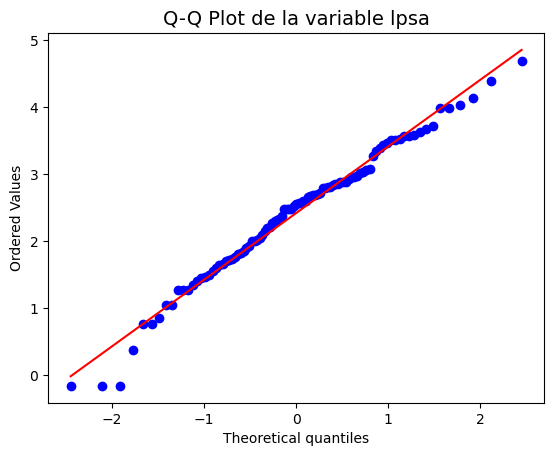

In [51]:
print("moyenne : ",data["lpsa"].mean())
print("Ecart-type : ",data["lpsa"].std())
print("Minimun : ", data["lpsa"].min())
print("Minimun : ", data["lpsa"].max())
stat, p_value = stats.shapiro(data['lpsa'])
print(f'Statistique du test: {stat}, p-value: {p_value}')# la pvalue > 0.05 donc on accepte l'hypothese de la normalite
# tracage du qq plot 
stats.probplot(data['lpsa'], dist="norm", plot=plt)
plt.title('Q-Q Plot de la variable lpsa', fontsize=14)
plt.show()


Cette variable est aussi normale.

#### age

moyenne :  63.865979381443296
Ecart-type :  7.445117060277636
Minimun :  41
Minimun :  79
Statistique du test: 0.9467927813529968, p-value: 0.000637602701317519


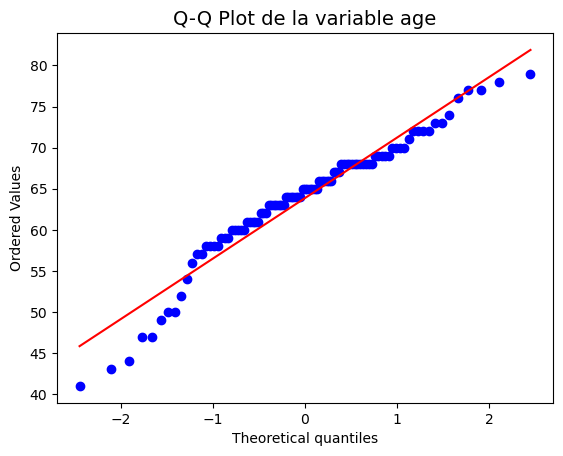

In [54]:
print("moyenne : ",data["age"].mean())
print("Ecart-type : ",data["age"].std())
print("Minimun : ", data["age"].min())
print("Minimun : ", data["age"].max())
stat, p_value = stats.shapiro(data['age'])
print(f'Statistique du test: {stat}, p-value: {p_value}')# la pvalue > 0.05 donc on accpete l'hypothese de la normalite
# tracage du qq plot 
stats.probplot(data['age'], dist="norm", plot=plt)
plt.title('Q-Q Plot de la variable age', fontsize=14)
plt.show()


La variable age ne suis donc pas une distribution normale.

### --- Variables qualitatives

#### svi

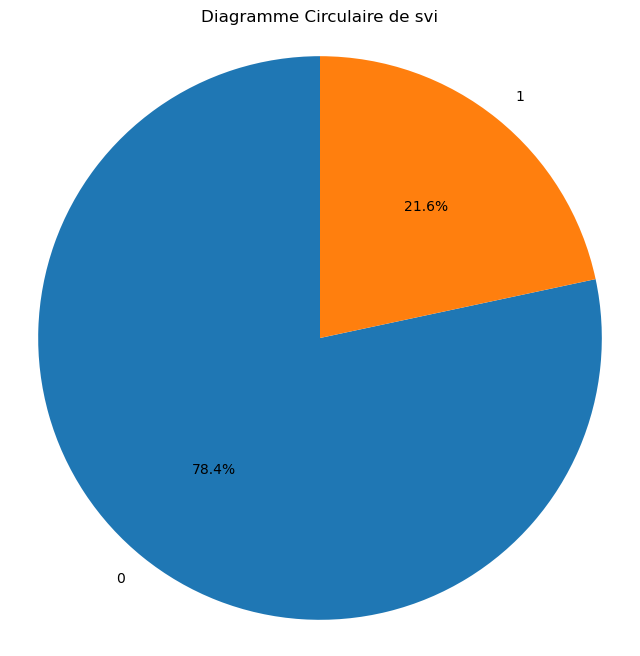

In [58]:
svi_counts = data['svi'].value_counts()

# Tracé du diagramme circulaire
plt.figure(figsize=(8, 8))  
plt.pie(svi_counts, labels=svi_counts.index, autopct='%1.1f%%', startangle=90)
plt.title('Diagramme Circulaire de svi')
plt.axis('equal')  # Pour assurer que le cercle soit bien proportionné
plt.show()

#### pgg45

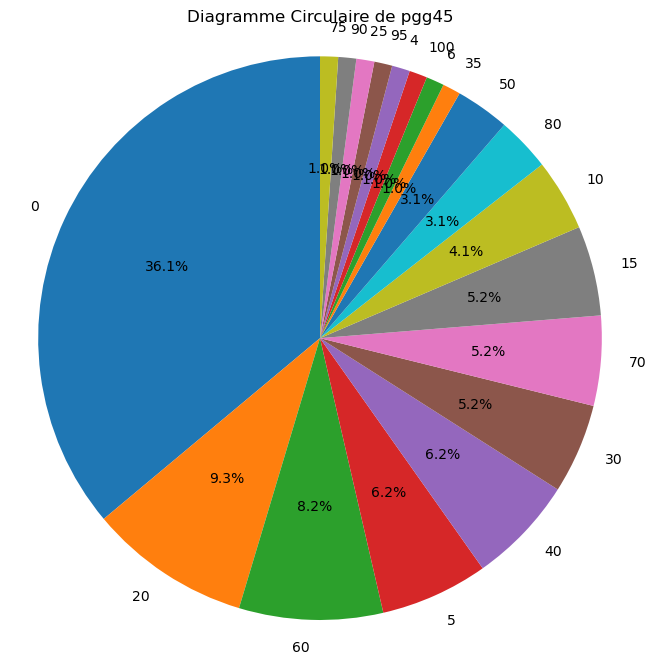

In [60]:
pgg45_counts = data['pgg45'].value_counts()

# Tracer le diagramme circulaire
plt.figure(figsize=(8, 8))  
plt.pie(pgg45_counts, labels=pgg45_counts.index, autopct='%1.1f%%', startangle=90)
plt.title('Diagramme Circulaire de pgg45')
plt.axis('equal')  # Pour assurer que le cercle soit bien proportionné
plt.show()

#### gleason

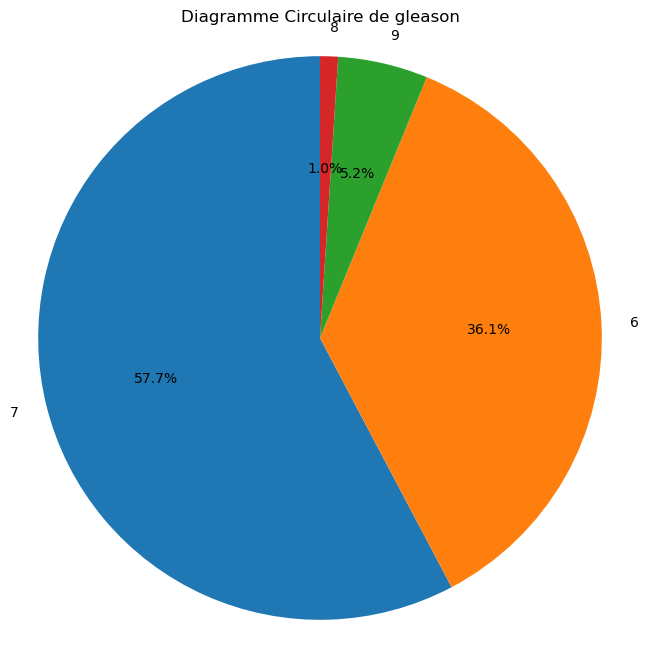

In [62]:
gleason_counts = data['gleason'].value_counts()

# Tracer le diagramme circulaire
plt.figure(figsize=(8, 8))  
plt.pie(gleason_counts, labels=gleason_counts.index, autopct='%1.1f%%', startangle=90)
plt.title('Diagramme Circulaire de gleason')
plt.axis('equal')  # Pour assurer que le cercle soit bien proportionné
plt.show()

### f- Statistiques bivariées entre y(lpsa) et xi

#### --- xi quantitative

#### xi=lweight

pearson Correlation between lpsa and lweight: 0.40955144367121704


<Axes: xlabel='lpsa', ylabel='lweight'>

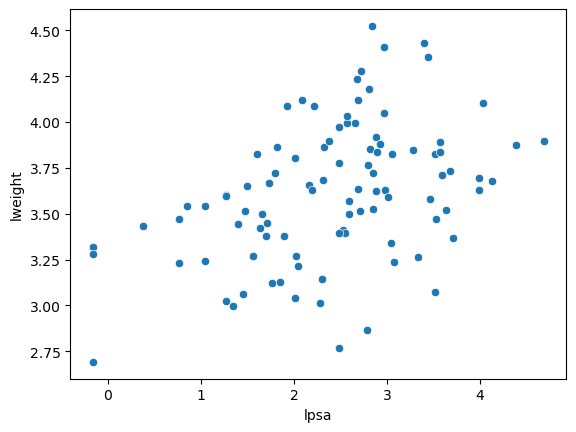

In [66]:
correlation_pearson = data['lpsa'].corr(data['lweight'], method='pearson')
print(f'pearson Correlation between lpsa and lweight: {correlation_pearson}')
# Tracer le nuage de points avec Seaborn
sns.scatterplot(x=data['lpsa'], y=data['lweight'])

lpsa et lweight ne semblent pas trop corrélées, ce qu'on va vérifier avec le test de  pearson car ces 02 variables sont normales.

#### xi=lcavol

pearson Correlation between lpsa and lcavol: 0.6719472997567859


<Axes: xlabel='lpsa', ylabel='lcavol'>

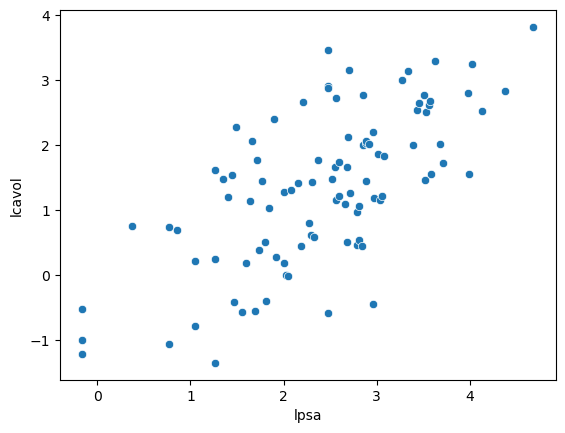

In [69]:
correlation_pearson = data['lpsa'].corr(data['lcavol'], method='pearson')
print(f'pearson Correlation between lpsa and lcavol: {correlation_pearson}')
sns.scatterplot(x=data['lpsa'], y=data['lcavol'])

pearson Correlation between lpsa and lcavol: 0.6719472997567859


<Axes: xlabel='lpsa', ylabel='lcavol'>

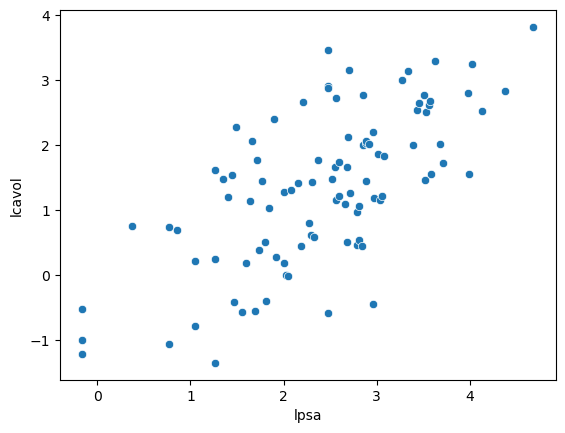

In [70]:
correlation_pearson = data['lpsa'].corr(data['lcavol'], method='pearson')
print(f'pearson Correlation between lpsa and lcavol: {correlation_pearson}')
sns.scatterplot(x=data['lpsa'], y=data['lcavol'])

#### xi=age

spearman Correlation between lpsa and age: 0.6719472997567859


<Axes: xlabel='lpsa', ylabel='age'>

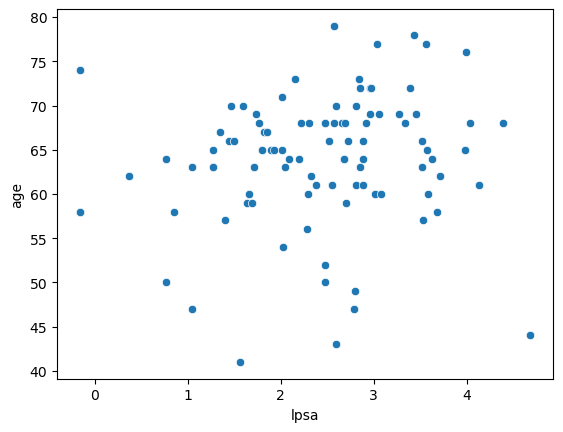

In [72]:
correlation_spearman = data['lpsa'].corr(data['age'], method='spearman')
print(f'spearman Correlation between lpsa and age: {correlation_pearson}')
sns.scatterplot(x=data['lpsa'], y=data['age'])

#### xi=lbph

spearman Correlation between lpsa and lbph: 0.6719472997567859


<Axes: xlabel='lpsa', ylabel='lbph'>

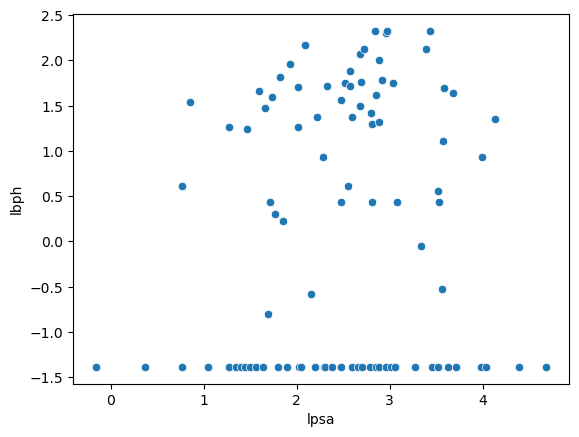

In [74]:
correlation_spearman = data['lpsa'].corr(data['lbph'], method='spearman')
print(f'spearman Correlation between lpsa and lbph: {correlation_pearson}')
# Tracer le nuage de points avec Seaborn
sns.scatterplot(x=data['lpsa'], y=data['lbph'])

#### xi=gleason

spearman Correlation between lpsa and gleason: 0.6719472997567859


<Axes: xlabel='lpsa', ylabel='gleason'>

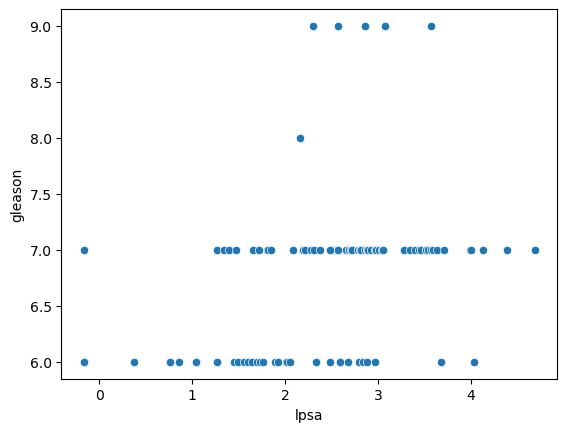

In [76]:
correlation_spearman = data['lpsa'].corr(data['gleason'], method='spearman')
print(f'spearman Correlation between lpsa and gleason: {correlation_pearson}')
sns.scatterplot(x=data['lpsa'], y=data['gleason'])

#### xi=lcp

spearman Correlation between lpsa and lcp: 0.6719472997567859


<Axes: xlabel='lpsa', ylabel='lcp'>

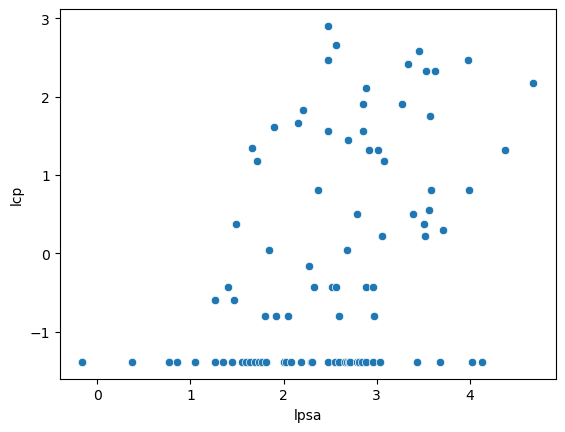

In [78]:
correlation_spearman = data['lpsa'].corr(data['lcp'], method='spearman')
print(f'spearman Correlation between lpsa and lcp: {correlation_pearson}')
sns.scatterplot(x=data['lpsa'], y=data['lcp'])

La corrélation est de 54.77% avec toutes les var quantitatives explicatives sauf avec la var lweight pour laquelle elle est de 32.7%.

#### --- xi qualitative

#### xi= svi 

In [82]:
grouped_data = data.groupby('svi')['lpsa'].describe()
print(grouped_data)

     count      mean       std       min       25%       50%       75%  \
svi                                                                      
0     76.0  2.174870  0.917997 -0.162519  1.629094  2.287420  2.807892   
1     21.0  3.297817  0.686100  2.213754  2.853592  3.275256  3.712352   

          max  
svi            
0    4.029806  
1    4.684443  


#### xi= gleason 

In [84]:
grouped_data = data.groupby('gleason')['lpsa'].describe()
print(grouped_data)

         count      mean       std       min       25%       50%       75%  \
gleason                                                                      
6         35.0  1.821489  0.953478 -0.162519  1.266948  1.766442  2.534952   
7         56.0  2.754799  0.869637 -0.162519  2.299996  2.797239  3.403522   
8          1.0  2.157559       NaN  2.157559  2.157559  2.157559  2.157559   
9          5.0  2.873180  0.487843  2.297573  2.568788  2.853592  3.075006   

              max  
gleason            
6        4.029806  
7        4.684443  
8        2.157559  
9        3.570940  


### g- Statistiques bivariées entre variables explicatives

####    lcavol et lweight

pearson Correlation between lcavol and lweight: 0.26067808312365076


<Axes: xlabel='lcavol', ylabel='lweight'>

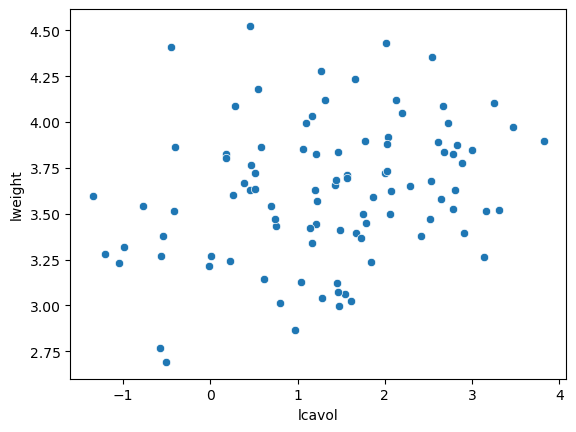

In [87]:
correlation_pearson = data['lcavol'].corr(data['lweight'], method='pearson')
print(f'pearson Correlation between lcavol and lweight: {correlation_pearson}')
sns.scatterplot(x=data['lcavol'], y=data['lweight'])

Elles sont faiblement corrélées.

#### lbph et lcavol

Spearman Correlation between lcavol and lbph: 0.01445579284898651


<Axes: xlabel='lcavol', ylabel='lbph'>

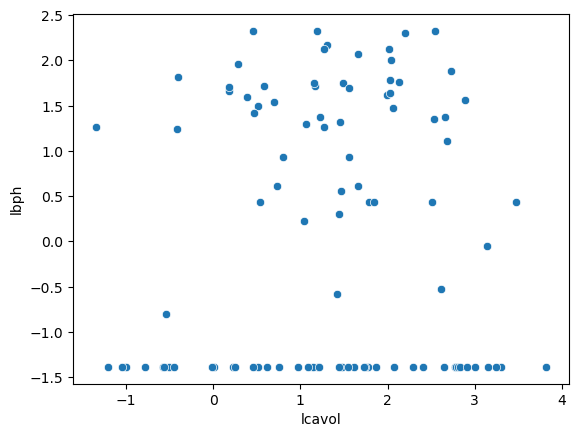

In [90]:
correlation_spearman = data['lcavol'].corr(data['lbph'], method='spearman')
print(f'Spearman Correlation between lcavol and lbph: {correlation_spearman}')
sns.scatterplot(x=data['lcavol'], y=data['lbph'])

Corrélation très faible entre les deux

#### lbph et lweight

Spearman Correlation between lbph and lweight: 0.48562715369160037


<Axes: xlabel='lbph', ylabel='lweight'>

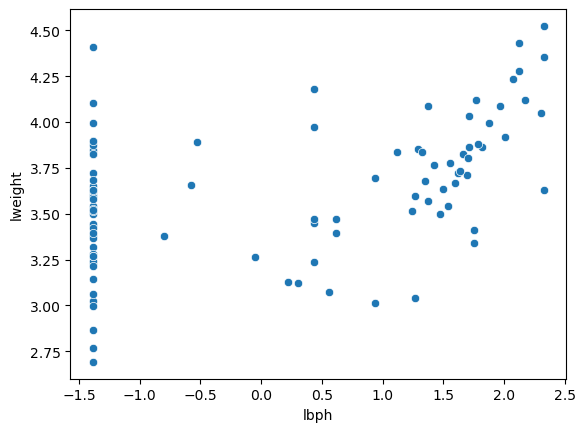

In [93]:
correlation_spearman = data['lbph'].corr(data['lweight'], method='spearman')
print(f'Spearman Correlation between lbph and lweight: {correlation_spearman}')
sns.scatterplot(x=data['lbph'], y=data['lweight'])

Corrélation moyenne

#### lbph et lcp

Spearman Correlation between lbph and lcp: 0.023159224094959074


<Axes: xlabel='lbph', ylabel='lcp'>

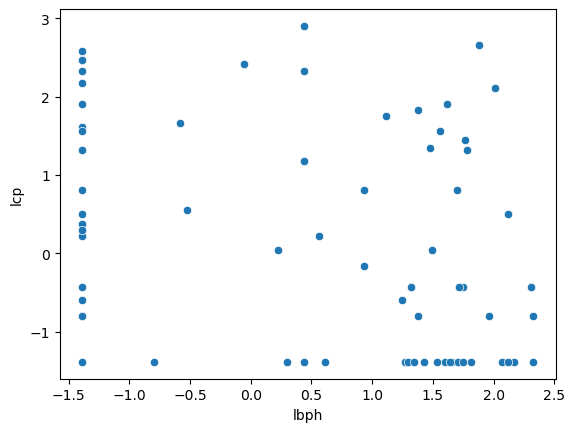

In [96]:
correlation_spearman = data['lbph'].corr(data['lcp'], method='spearman')
print(f'Spearman Correlation between lbph and lcp: {correlation_spearman}')
sns.scatterplot(x=data['lbph'], y=data['lcp'])

#### lcp et lpsa

Spearman Correlation between lcp and lpsa: 0.4400795792143711


<Axes: xlabel='lcp', ylabel='lpsa'>

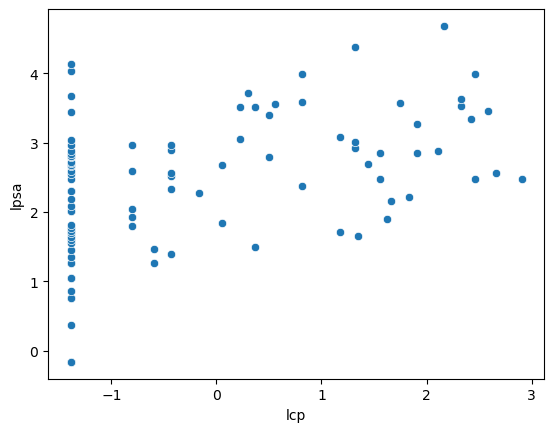

In [98]:
correlation_spearman = data['lcp'].corr(data['lpsa'], method='spearman')
print(f'Spearman Correlation between lcp and lpsa: {correlation_spearman}')
sns.scatterplot(x=data['lcp'], y=data['lpsa'])

#### xi= pgg45

In [100]:
grouped_data = data.groupby('pgg45')['lpsa'].describe()
print(grouped_data)

       count      mean       std       min       25%       50%       75%  \
pgg45                                                                      
0       35.0  1.821489  0.953478 -0.162519  1.266948  1.766442  2.534952   
4        1.0  2.788093       NaN  2.788093  2.788093  2.788093  2.788093   
5        6.0  2.131236  0.664940  1.348073  1.570456  2.181470  2.597850   
6        1.0  2.374906       NaN  2.374906  2.374906  2.374906  2.374906   
10       4.0  2.796063  0.508695  2.307573  2.435683  2.720540  3.080919   
15       5.0  2.750022  0.807093  2.157559  2.191654  2.553344  2.718001   
20       9.0  2.259762  1.054810 -0.162519  1.816452  2.521721  2.887590   
25       1.0  3.037354       NaN  3.037354  3.037354  3.037354  3.037354   
30       5.0  2.720490  1.237495  1.266948  1.470176  3.565298  3.587677   
35       1.0  2.213754       NaN  2.213754  2.213754  2.213754  2.213754   
40       6.0  3.187748  0.803744  2.568788  2.721535  2.833001  3.350408   
50       3.0

### 4- Standardisation

In [102]:
# Standardisation des données
scaler = StandardScaler()
data_scaled = scaler.fit_transform(data[quant])

# Créer un DataFrame avec les données standardisées
data_standardized = pd.DataFrame(data_scaled, columns=data[quant].columns)

# Afficher un aperçu des données après standardisation
print("\nAperçu des données après standardisation :")
print(data_standardized.describe())
#Repercussion sur la bd
data[quant]=data_standardized


Aperçu des données après standardisation :
             lcavol       lweight          lpsa           age          lbph  \
count  9.700000e+01  9.700000e+01  9.700000e+01  9.700000e+01  9.700000e+01   
mean   4.578239e-17  1.144560e-17  2.911474e-17  4.131861e-16 -2.432190e-17   
std    1.005195e+00  1.005195e+00  1.005195e+00  1.005195e+00  1.005195e+00   
min   -2.300218e+00 -2.483975e+00 -2.630231e+00 -3.087227e+00 -1.030029e+00   
25%   -7.139973e-01 -6.504793e-01 -6.640968e-01 -5.219612e-01 -1.030029e+00   
50%    8.264956e-02  2.723646e-02  1.379700e-01  1.531086e-01  1.383966e-01   
75%    6.626939e-01  6.620328e-01  5.656884e-01  5.581506e-01  1.010033e+00   
max    2.107397e+00  2.425594e+00  2.310139e+00  2.043304e+00  1.542252e+00   

                lcp  
count  9.700000e+01  
mean   3.662591e-17  
std    1.005195e+00  
min   -8.676552e-01  
25%   -8.676552e-01  
50%   -4.450983e-01  
75%    9.762744e-01  
max    2.216735e+00  


On poursuit l'analyse avec les données standardisées

### 5- Séparation des données

#### Target/dataset

In [106]:
X = data.drop(columns=['lpsa'])
y = data['lpsa']

### 6- Entrainement/test

In [108]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=1)


### 7- Régression linéaire

In [110]:
lin_reg = LinearRegression()
lin_reg.fit(X_train, y_train)

LinearRegression()

#### Evaluation 

In [112]:
lin_reg = LinearRegression()
lin_reg.fit(X_train, y_train)
y_pred_lin = lin_reg.predict(X_test)
print("MSE pour la régression linéaire: ", mean_squared_error(y_test, y_pred_lin))



MSE pour la régression linéaire:  0.4376707952531963


### 8- Modèle de régression Ridge

In [114]:
ridge_reg = Ridge(alpha=2.14)
ridge_reg.fit(X_train, y_train)

Ridge(alpha=2.14)

#### Prédiction/ évaluation

In [116]:
y_pred_ridge = ridge_reg.predict(X_test)
print("MSE pour la régression Ridge: ", mean_squared_error(y_test, y_pred_ridge))



MSE pour la régression Ridge:  0.4254856664912496


### 9- Validation croisée pour Ridge

In [118]:
alphas = np.logspace(-3, 3, 100)
ridge_cv_scores = [cross_val_score(Ridge(alpha=alpha), X_train, y_train, cv=5, scoring='neg_mean_squared_error').mean() for alpha in alphas]
best_alpha_ridge = alphas[np.argmax(ridge_cv_scores)]
ridge_best = Ridge(alpha=best_alpha_ridge)
ridge_best.fit(X_train, y_train)
y_pred_ridge_best = ridge_best.predict(X_test)
print(f"Meilleur alpha pour Ridge: {best_alpha_ridge}")
print("MSE pour la meilleure régression Ridge: ", mean_squared_error(y_test, y_pred_ridge_best))


Meilleur alpha pour Ridge: 4.9770235643321135
MSE pour la meilleure régression Ridge:  0.42770003684191593


Revoir car pour la meilleure reg, on trouve une erreur sup...

### 10- Modèle de régression Lasso

In [121]:
lasso_reg = Lasso(alpha=0.08)
lasso_reg.fit(X_train, y_train)

Lasso(alpha=0.08)

#### Prédiction/ évaluation

In [123]:
y_pred_lasso = lasso_reg.predict(X_test)
print("MSE pour la régression Lasso: ", mean_squared_error(y_test, y_pred_lasso))

MSE pour la régression Lasso:  0.45956289404499806


### 11- Validation croisée pour Lasso

In [125]:
lasso_cv_scores = [cross_val_score(Lasso(alpha=alpha), X_train, y_train, cv=5, scoring='neg_mean_squared_error').mean() for alpha in alphas]
best_alpha_lasso = alphas[np.argmax(lasso_cv_scores)]
lasso_best = Lasso(alpha=best_alpha_lasso)
lasso_best.fit(X_train, y_train)
y_pred_lasso_best = lasso_best.predict(X_test)
print(f"Meilleur alpha pour Lasso: {best_alpha_lasso}")
print("MSE pour la meilleure régression Lasso: ", mean_squared_error(y_test, y_pred_lasso_best))



Meilleur alpha pour Lasso: 0.004037017258596553
MSE pour la meilleure régression Lasso:  0.4313834969904657


### 12- Régression ElasticNet avec validation croisée pour déterminer α et λ optimaux


In [127]:
from sklearn.model_selection import GridSearchCV

elastic_net = ElasticNet()
param_grid = {
    'alpha': alphas,
    'l1_ratio': np.linspace(0.01, 1, 20)
}
grid_search = GridSearchCV(elastic_net, param_grid, cv=5, scoring='neg_mean_squared_error')
grid_search.fit(X_train, y_train)
best_params = grid_search.best_params_
elastic_best = ElasticNet(alpha=best_params['alpha'], l1_ratio=best_params['l1_ratio'])
elastic_best.fit(X_train, y_train)
y_pred_elastic = elastic_best.predict(X_test)
print(f"Meilleurs paramètres pour ElasticNet: {best_params}")
print("MSE pour la régression ElasticNet: ", mean_squared_error(y_test, y_pred_elastic))

Meilleurs paramètres pour ElasticNet: {'alpha': 0.07564633275546291, 'l1_ratio': 0.01}
MSE pour la régression ElasticNet:  0.43027056911359596


### 13- Interprétation des résultats trouvés

Les MSE qui sont des erreurs sont pourtant plus grands pour les valeurs optimales, cela se justifie du fait que les paramètres optimaux sont donnés pour des ensembles de validation, où la régularisation réduit le surajustement, permettant une meilleure généralisation sur des données non vues.

### 14- Prédiction pour un patient spécifique

In [131]:
patient_data_quant = np.array([[2.8, 3, 0.0, 70, -1.4, 1.5]])
patient_data_scaled = scaler.transform(patient_data_quant)
patient_data_scaled = np.insert(patient_data_scaled, [3, 5], [1, 7])

# S'assurer que la forme de patient_data_scaled correspond à ce que le modèle attend
patient_data_scaled = patient_data_scaled.reshape(1, -1)

# Prédiction avec le modèle entraîné
patient_pred = elastic_best.predict(patient_data_scaled)

# Affichage de la prédiction
print(f"Prédiction de l'expression de l'antigène (lpsa) pour le patient : {patient_pred[0]}")


Prédiction de l'expression de l'antigène (lpsa) pour le patient : 0.6174741508108672


C:\Users\SAM\AppData\Local\anaconda3\Lib\site-packages\sklearn\base.py:464: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(
C:\Users\SAM\AppData\Local\anaconda3\Lib\site-packages\sklearn\base.py:464: UserWarning: X does not have valid feature names, but ElasticNet was fitted with feature names
  warnings.warn(


La valeur obtenue est une valeur standardisée. La valeur correspondante est obtenue comme suit: 

In [133]:
valeur_standardisee= patient_pred[0]
#valeur_originale = (valeur_standardisee * y.std() + y.mean()) #y est déjà stantdardisée
moy=2.4752489081970652
std=0.8412612089434361
valeur_originale = valeur_standardisee * std + moy
print(f"Prédiction déstandardisée : {valeur_originale}")

Prédiction déstandardisée : 2.994705958799537


### 15- Sauvegarde du modèle final


In [135]:
import joblib
joblib.dump(elastic_best, 'elastic_net_model.pkl')
# Sauvegarder le modèle de la sorte permet de le recharger ultérieurement sans avoir à le réentraîner, ce qui  fait gagner du temps et des ressources.

['elastic_net_model.pkl']